In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

from common import NGSpiceRaw, FIG_WIDTH, figure_save

%matplotlib widget

In [3]:
plt.style.use(["science", "grid"])
plt.style.use({
    'font.size': 14,                   # Slightly larger base font
    'axes.labelsize': 14,
    'axes.titlesize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})

In [4]:
data = NGSpiceRaw("simulation/comparator_tb.raw", live=False)
print("Fields:", data.names)

Loaded 1 plots from simulation/comparator_tb.raw
Fields: ('time', 'v(x1.p)', 'v(clk)', 'v(vdd)', 'v(out1)', 'v(out2)', 'v(vss)', 'v(in_p)', 'v(x1.s)', 'v(x1.n)', 'v(in_n)', 'v(x1.xc2.1)', 'v(x1.xc4.1)', 'v(x1.xc1.1)', 'v(x1.xc3.1)', 'v(net1)', 'v(out1_dup)', 'v(e1_int1)', 'v(out2_dup)', 'v(e2_int1)', 'v(out1_inv)', 'v(out2_inv)', 'v(out1_dup_inv)', 'v(out2_dup_inv)', 'v(x2.net3)', 'v(out1_old)', 'v(out2_old)', 'v(x2.net1)', 'v(x2.net2)', 'v(x2.xc1.1)', 'v(x2.xc2.1)', 'v(x2.xc3.1)', 'v(x2.xc4.1)', 'i(be2)', 'i(be1)', 'i(e2)', 'i(e1)', 'i(vdiff1)', 'i(vcm)', 'i(vdiff)', 'i(vclk)', 'i(vss)', 'i(vdd)', 'v(n.x2.xm7.nsg13_lv_nmos#NOI)', 'v(n.x2.xm7.nsg13_lv_nmos#GP)', 'v(n.x2.xm7.nsg13_lv_nmos#SI)', 'v(n.x2.xm7.nsg13_lv_nmos#DI)', 'v(n.x2.xm7.nsg13_lv_nmos#BP)', 'v(n.x2.xm7.nsg13_lv_nmos#BI)', 'v(n.x2.xm7.nsg13_lv_nmos#BS)', 'v(n.x2.xm7.nsg13_lv_nmos#BD)', 'v(n.x2.xm7.nsg13_lv_nmos#INT1)', 'v(n.x2.xm7.nsg13_lv_nmos#INT2)', 'v(n.x2.xm7.nsg13_lv_nmos#INT3)', 'v(n.x2.xm7.nsg13_lv_nmos#INT4)', '

In [14]:
times = data['time']
clk = data['v(clk)']
vin = data['v(in_p)'] - data['v(in_n)']
vout1 = data['v(out1)']
vout1n = data['v(out1_inv)']
vout2 = data['v(out2)']
vout2n = data['v(out2_inv)']

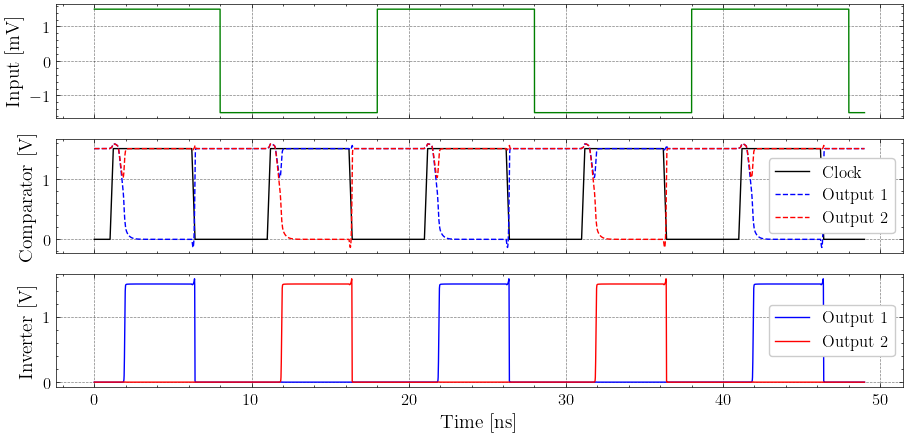

In [20]:
fix, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(FIG_WIDTH, FIG_WIDTH * 0.5), sharex=True)
ax1.plot(times * 1e9, vin * 1e3, color='green')
ax1.set_ylabel('Input [mV]')
ax2.plot(times * 1e9, clk, label='Clock', color='black')
ax2.plot(times * 1e9, vout1, label='Output 1', color='blue', linestyle='--')
ax2.plot(times * 1e9, vout2, label='Output 2', color='red', linestyle='--')
ax2.set_ylabel('Comparator [V]')
ax2.legend()
ax3.plot(times * 1e9, vout1n, label='Output 1', color='blue')
ax3.plot(times * 1e9, vout2n, label='Output 2', color='red')
ax3.set_ylabel('Inverter [V]')
ax3.set_xlabel('Time [ns]')
ax3.legend()
plt.tight_layout()
plt.show()

figure_save(plt.gcf(), "comparator")